<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import" data-toc-modified-id="Import-1">Import</a></span></li><li><span><a href="#Rossler-Chaotic-System" data-toc-modified-id="Rossler-Chaotic-System-2">Rossler Chaotic System</a></span><ul class="toc-item"><li><span><a href="#Rossler" data-toc-modified-id="Rossler-2.1">Rossler</a></span></li></ul></li><li><span><a href="#Colpitts-Chaotic-System" data-toc-modified-id="Colpitts-Chaotic-System-3">Colpitts Chaotic System</a></span></li><li><span><a href="#Example-Usage" data-toc-modified-id="Example-Usage-4">Example Usage</a></span><ul class="toc-item"><li><span><a href="#Rossler" data-toc-modified-id="Rossler-4.1">Rossler</a></span></li><li><span><a href="#Colpitts" data-toc-modified-id="Colpitts-4.2">Colpitts</a></span></li></ul></li></ul></div>

## Import

In [12]:
import time
import numpy as np

## Rossler Chaotic System

### Rossler 

\begin{align}
    \begin{cases}
        \frac{dx_1}{dt} &= -(x_2 + x_3) \\[7pt]
        \frac{dx_2}{dt} &= x_1 + a * x_2 \\[7pt]
        \frac{dx_3}{dt} &= b + x_3 * (x_1 - c)
    \end{cases}
    \label{eq:Rossler}
\end{align}

In [112]:
def xdot_RosslerEquation(x, a = 0.2, b = 0.2, c = 5.7):
    """
        The Rossler System 
        
        @ parameter 
            x: a vector with 3 values
            
            a, b, c: the parameters
        
        @ return:
            x_dot: the x_dot vector with 3 values for x
    """
    x1, x2, x3 = x[0], x[1], x[2]
    x1_dot = -(x2 + x3)
    x2_dot = x1 + a * x2
    x3_dot = b + x3 * (x1 - c)

    x_dot = np.asarray([x1_dot, x2_dot, x3_dot])
    return x_dot

In [168]:
def xdot_RosslerCoupling(X, Cs, a = 0.2, b = 0.2, c = 5.7):
    """
        The Rossler System 
        
        @ parameter 
        
            X: nsites * 3, the x1, x2, and x3 values for all the nsites
            
            Cs: the coupling weight between each pair of sites
   
        
        @ return:
            x_dot: the x_dot vector with 3 values for x
    """
    
    nsites = X.shape[0]
    
    x_dots = np.empty(shape=(0, 3))
    for i in range(nsites):
        x1, x2, x3 = X[i, 0], X[i, 1], X[i, 2]
        
        x1_dot = -(x2 + x3) + np.dot(Cs[i,:], X[:, 0] - x1)
        x2_dot = x1 + a * x2
        x3_dot = b + x3 * (x1 - c)
        
        
        x_dots = np.append(x_dots, np.asarray([[x1_dot, x2_dot, x3_dot]]), axis = 0)
        
        del x1, x2, x3, x1_dot, x2_dot, x3_dot
    
    return x_dots

In [295]:
if 'XEpochs' in locals():
    del XEpochs

#
nsites = 4
Cs = np.zeros((nsites, nsites))
Cs[0,1] = 0


#
dt = 0.05 # initial time resolution
k = 5000
n = 2 ** i

nepochs = 50


epochi = 0
for epochi in range(nepochs):
    
    # initial X0.shape = (nsites, 3)
    X0 = np.random.rand(nsites, 3) + np.random.randint(low = -3, high=3, size=(nsites, 3))
    
    if(epochi == 0):
        print(X0)
    
    t = 0
    ts = np.asarray([0]) # ts.shape = (ntemp,)
    
    X = np.asarray(X0) # X.shape = (nsites, 3)
    Xs = np.asarray([X0]) # Xs.shape = (ntemp, nsites, 3)
    
    for j in range(n*k):
        
        t = j * h # t is a scalar
        
        # nsites * 3
        X = X + xdot_RosslerCoupling(X, Cs) * h
             
        ts = np.append(ts, t)
        Xs = np.append(Xs, [X], axis = 0) 
        
        del t
    
    if 'XEpochs' not in locals():
        XEpochs = [Xs]
    else:   
        XEpochs = np.append(XEpochs, [Xs], axis = 0) # XEpochs.shape = (nepochs, ntemp, nsite, 3)
    
    del ts, X, Xs

[[-1.8939008  -1.74053893  1.89286803]
 [ 0.37761849 -0.29768168  1.22539134]
 [-0.068928    1.17519634 -2.71306596]
 [ 0.03630349 -1.44643549  2.88208534]]


In [297]:
site1, site2 = 0, 1
sig1, sig2 = XEpochs[:, 10:1000, site1, 0], XEpochs[:, 10:1000, site2, 0]

ciCOH = np.mean(ciCoherence_acrosstrials(sig1, sig2))

print(ciCOH)

-0.014240234691502237


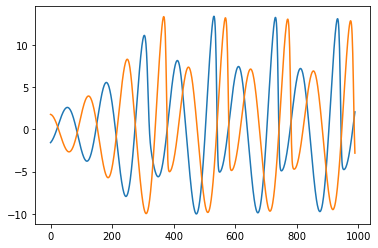

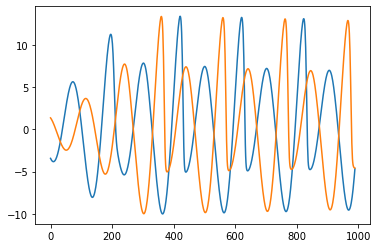

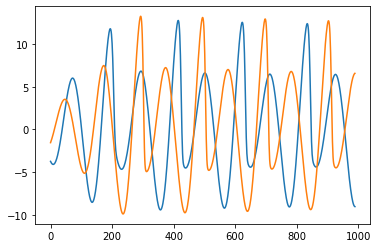

In [288]:
plt.plot(XEpochs[0, 10:1000, 0, 0])
plt.plot(XEpochs[0, 10:1000, 2, 0])
plt.show()


plt.plot(XEpochs[1, 10:1000, 0, 0])
plt.plot(XEpochs[1, 10:1000, 2, 0])
plt.show()

plt.plot(XEpochs[2, 10:1000, 0, 0])
plt.plot(XEpochs[2, 10:1000, 2, 0])
plt.show()

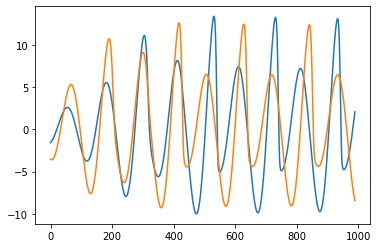

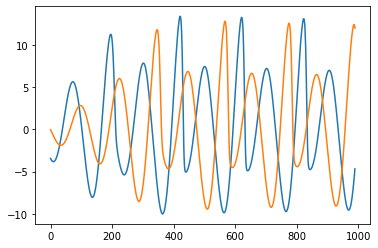

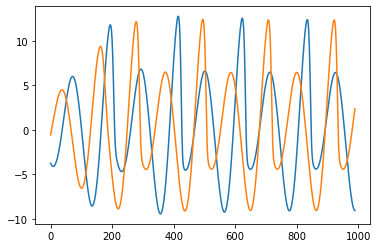

In [287]:
plt.plot(XEpochs[0, 10:1000, 0, 0])
plt.plot(XEpochs[0, 10:1000, 1, 0])
plt.show()


plt.plot(XEpochs[1, 10:1000, 0, 0])
plt.plot(XEpochs[1, 10:1000, 1, 0])
plt.show()

plt.plot(XEpochs[2, 10:1000, 0, 0])
plt.plot(XEpochs[2, 10:1000, 1, 0])
plt.show()

In [180]:
import os, sys

# extract the exp folder path
currfolder = os.getcwd()
codefolder = currfolder[0 : currfolder.find('code')+len('code')]

# add path the exp folder
sys.path.append(codefolder)

# import_nbmodule used for import package in .ipynb
import import_nbmodule

# import util/folder_extract.pynb 
from util.folder_extract import exp_subfolders, code_corresfolder

# import ciCoherence_overtime in connAnalyTool/synchronization_indices.ipynb
from connAnalyTool.synchronization_indices import ciCoherence_acrosstrials
from connAnalyTool.synchronization_indices import ciCoherence_overtime


importing Jupyter notebook from /Users/linglingyang/yang7003@umn.edu/NMRC_umn/Projects/FCAnalysis/exp/code/util/folder_extract.ipynb
importing Jupyter notebook from /Users/linglingyang/yang7003@umn.edu/NMRC_umn/Projects/FCAnalysis/exp/code/connAnalyTool/synchronization_indices.ipynb


In [186]:
ciCOH = np.mean(ciCoherence_acrosstrials(sig1, sig2))

/Users/linglingyang/yang7003@umn.edu/NMRC_umn/Projects/FCAnalysis/exp/code/connAnalyTool/synchronization_indices.ipynb:42: RuntimeWarning: divide by zero encountered in true_divide
  "\n",
/Users/linglingyang/miniconda3/envs/general/lib/python3.6/site-packages/numpy/core/_methods.py:151: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


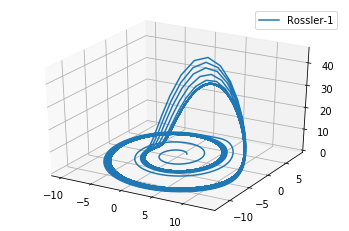

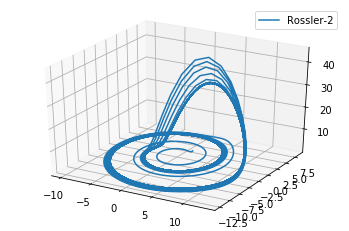

In [179]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(Xs[:,0,0], Xs[:,0,1], Xs[:,0,2], label='Rossler-1')
ax.legend()

plt.show()


fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(Xs[:,1,0], Xs[:,1,1], Xs[:,1,2], label='Rossler-2')
ax.legend()

plt.show()

In [ ]:
def Rossler(x0 = [1, 1, 0], tmax = 20):
    """
        @ parameter:
        
            x0: the initial point
            
            tmax: the maximum running time (s)
        
        @ return:
        
            xs: the generated time series shape = (npoints, 3)
            
            ts: the corresponding time shape = (npoints, )
    
    """
    
    dt = 0.05 # initial time resolution
    k = 5000

    elapseT = 0
    start_time = time.time()
    i = 0
    while(elapseT < tmax):
        
        # updated npoints for the new round to be n * k
        n = 2 ** i 
        
        # time resolution for the new round
        h = dt/n 

        xs = np.asarray([x0])
        ts = np.asarray([0])

        t, x = 0, np.asarray(x0)
        for j in range(n*k):

            x = x + xdot_RosslerEquation(x) * h
            t = j * h

            xs = np.append(xs, [x], axis = 0)
            ts = np.append(ts, t)

        elapseT = time.time() - start_time
        
        i += 1
        
    return xs, ts

## Colpitts Chaotic System

\begin{align}
    \begin{cases}
        \frac{dx_1^{(i)}}{dt} &= \frac{g}{Q(1-k)}[\alpha(e^{-x_2^{(i)}} -1) + x_3^{(i)}]\\[7pt]
        \frac{dx_2^{(i)}}{dt} &= 
         \frac{g}{Qk}[(1-\alpha)(e^{(-x_2^{(i)})}-1) + x_3^{(i)}]\\[7pt]
         &\quad + \sum_{j=1}^{N}{C_{i,j}(x_2^{(j)} - x_2^{(i)})}\\[7pt]
        \frac{dx_3^{(i)}}{dt} &=
        -\frac{Qk(1-k)}{g}(x_1^{(i)} + x_2^{(i)}) - \frac{1}{Q}x_3^{(i)}
    \end{cases}
	\label{eq:Colpitts}
\end{align}

In [72]:
def xdot_ColpittsEquation(x, X2, C, k, g, Q, alpha):
    """
    The differential equation Colpitts System 

    @ parameter 

        x: a vector with 3 values

        X2: a vector containing the variable x2 in all the sites, shape = (nsites,)

        C: a vector containing the coupling values between the current site and all sites, shape = (nsites, )

    @ return:
        x_dot: with 3 values for x (None if overflow)

    """
    x1, x2, x3 = x[0], x[1], x[2]


    exp_nx2 = np.exp(-x2)

    # overflow in exp, drop and redo this epoch 
    if(np.isinf(exp_nx2)):
         return None

    x1_dot = g/(Q*(1-k)) * (alpha*(exp_nx2 -1) + x3)
    x2_dot = g/(Q*k)*((1 - alpha) *(exp_nx2 - 1) + x3) + np.dot(C, (X2 - x2))
    x3_dot = -Q*k*(1-k)/g * (x1 + x2) - 1/Q * x3
    
    x_dot = np.asarray([x1_dot, x2_dot, x3_dot])
    
    return x_dot

In [73]:
def Colpitts(nsites, Cs, tmax = 100):
    """
        @ parameter:
            
            nsites: the total number of oscillators
            
            Cs: a matrix containing the coupling values between every two sites, shape = (nsites, nsites)
            
            
            tmax: the maximum running time (s)
        
        @ return:
        
            xs: the generated time series shape = (npoints, nsites, 3)
            
            ts: the corresponding time shape = (npoints, )
    
    """
    
    
    # k is the same for all the oscillators
    k = 0.5
    
    # g, Q and alpha different for each oscillator
    gs = np.random.uniform(low = 4.006, high = 4.428,size = nsites)
    Qs = np.random.uniform(low = 1.342, high = 1.483,size = nsites) 
    alphas = np.random.uniform(low = 0.949, high = 0.999, size = nsites)
    
    
    
    dt = 0.05 # initial time resolution
    nstep = 5000
    
    x0 = np.random.rand(nsites, 3)

    elapseT = 0
    start_time = time.time()
    i = 0
    while(elapseT < tmax):
        
        # updated npoints for the new round to be n * k
        n = 2 ** i 
        
        # time resolution for the new round
        h = dt/n 

        xs = np.asarray([x0])
        ts = np.asarray([0])

        t, x = 0, np.asarray(x0)
        for j in range(n*nstep):

            # for each site
            for si in range(nsites):
                xi = x[si, :]
                X2 = x[:, 1]
                C = Cs[si,:]
                
                g, Q, alpha = gs[si], Qs[si], alphas[si]
                
                xi = xi + xdot_ColpittsEquation(xi, X2, C, k, g, Q, alpha) * h
                
                x[si, :] = xi
            
            t = j * h

            xs = np.append(xs, [x], axis = 0)
            ts = np.append(ts, t)

        elapseT = time.time() - start_time
        
        i += 1
        
    return xs, ts

## Example Usage

### Rossler

In [8]:
xs, ts = Rossler(x0 = [1, 1, 0])

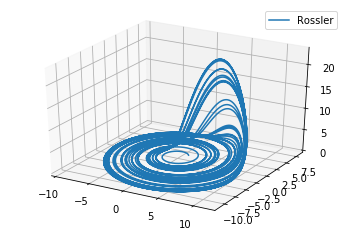

In [11]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(xs[:,0], xs[:,1], xs[:,2], label='Rossler')
ax.legend()

plt.show()

### Colpitts

In [25]:
nsites = 3
Cs = np.empty(shape=(nsites, nsites))
Cs[0,1] = np.random.uniform(1,3)
Cs[1,0] = Cs[0,1]

In [74]:
# xs_col: npoints * nsites * 3
xs_col, ts_col = Colpitts(nsites = nsites, Cs = Cs, tmax = 180)

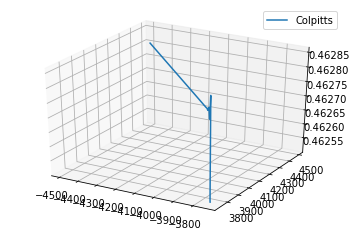

In [75]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')

isite = 0
ax.plot(xs_col[:,isite,0], xs_col[:,isite,1], xs_col[:,isite,2], label='Colpitts')
ax.legend()

plt.show()

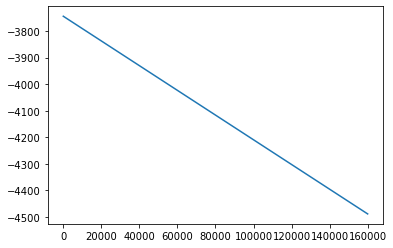

In [76]:
plt.plot(xs_col[:,0,0])